<a href="https://colab.research.google.com/github/CarolineVicente/Machine_Learn/blob/main/deep_learning_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [28]:
import torch
from torch import nn
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons

from mpl_toolkits.mplot3d import Axes3D, proj3d


In [2]:
lista = [[123],
        [456]]

Tipos de Tensores

In [3]:
tns = torch.Tensor(lista)
print(tns.dtype)
print(tns)

tns = torch.FloatTensor(lista)
print(tns.dtype)
print(tns)

tns = torch.DoubleTensor(lista)
print(tns.dtype)
print(tns)

tns = torch.LongTensor(lista)
print(tns.dtype)
print(tns)

torch.float32
tensor([[123.],
        [456.]])
torch.float32
tensor([[123.],
        [456.]])
torch.float64
tensor([[123.],
        [456.]], dtype=torch.float64)
torch.int64
tensor([[123],
        [456]])


A partir de arrays numpy

In [4]:
arr = np.random.rand(3,4)
tns = torch.from_numpy(arr)
print(arr)
print(arr.dtype)
print(tns)
print(tns.dtype)

[[0.44697238 0.40103782 0.5818301  0.46159761]
 [0.74487497 0.45448634 0.01165019 0.23694978]
 [0.81185702 0.21773673 0.46938343 0.96379472]]
float64
tensor([[0.4470, 0.4010, 0.5818, 0.4616],
        [0.7449, 0.4545, 0.0117, 0.2369],
        [0.8119, 0.2177, 0.4694, 0.9638]], dtype=torch.float64)
torch.float64


Tensores inicalizados

In [5]:
tns1 = torch.ones(2,3)
tns0 = torch.zeros(2,3)
tnsr = torch.rand(2,3)
print(tns1)
print(tns0)
print(tnsr)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.0192, 0.1745, 0.0249],
        [0.9219, 0.8915, 0.8024]])


Tensor para array numpy

In [6]:
arr = tnsr.data.numpy()
print(arr)

[[0.01916248 0.1745286  0.02485937]
 [0.92194015 0.89147305 0.80241543]]


Indexação

In [7]:
print(tnsr)
print('')
tnsr[0,2] = -10
print(tnsr)
print('')
print(tnsr[0:2])
print('')
print(tnsr[0:,2])

tensor([[0.0192, 0.1745, 0.0249],
        [0.9219, 0.8915, 0.8024]])

tensor([[  0.0192,   0.1745, -10.0000],
        [  0.9219,   0.8915,   0.8024]])

tensor([[  0.0192,   0.1745, -10.0000],
        [  0.9219,   0.8915,   0.8024]])

tensor([-10.0000,   0.8024])


Operações com Tensores

In [8]:
tns = tnsr[0:2, :]
print(tns)
print(tns1)

print(tns + tns1)
print(tns.add(tns1))
print(tns.sub(tns1))
print(tns.mul(tns1))
print(tns.div(tns1))

tensor([[  0.0192,   0.1745, -10.0000],
        [  0.9219,   0.8915,   0.8024]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[ 1.0192,  1.1745, -9.0000],
        [ 1.9219,  1.8915,  1.8024]])
tensor([[ 1.0192,  1.1745, -9.0000],
        [ 1.9219,  1.8915,  1.8024]])
tensor([[ -0.9808,  -0.8255, -11.0000],
        [ -0.0781,  -0.1085,  -0.1976]])
tensor([[  0.0192,   0.1745, -10.0000],
        [  0.9219,   0.8915,   0.8024]])
tensor([[  0.0192,   0.1745, -10.0000],
        [  0.9219,   0.8915,   0.8024]])


In [9]:
tns = torch.randn(2,2,3)
print(tns)

print(tns1.size())

tns = tns.view(tns.size(0), -1)
print(tns)

tensor([[[ 0.1796, -0.3428, -0.6696],
         [-3.3083, -0.6312, -0.6821]],

        [[-0.1222,  1.4761,  0.1876],
         [-0.7917, -0.3192, -0.5978]]])
torch.Size([2, 3])
tensor([[ 0.1796, -0.3428, -0.6696, -3.3083, -0.6312, -0.6821],
        [-0.1222,  1.4761,  0.1876, -0.7917, -0.3192, -0.5978]])


GPU Cast

In [10]:
tns = torch.randn(10)

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

tns = tns.to(device)
print(tns)


cuda
tensor([ 2.2330,  0.7361,  0.9562,  1.6721,  0.1297,  0.3792, -0.3303, -1.5991,
         0.5032, -0.2836], device='cuda:0')


Perceptron - Classificação Linear


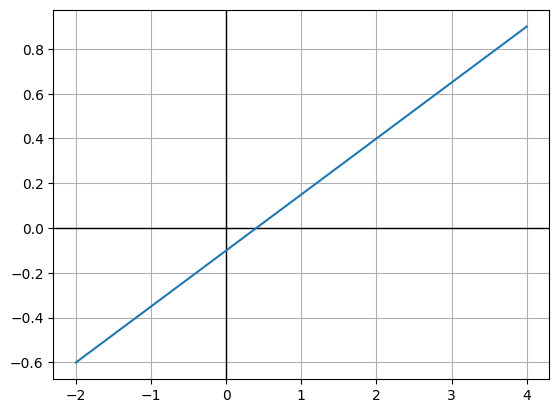

In [11]:
a = -1
b = 4
c = 0.4

# ax + by + c = 0
# y = (-a*x -c)/b
def plotline(a, b, c):
  x = np.linspace(-2, 4, 50)
  y = (-a*x -c)/b

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)

plotline(a, b, c)

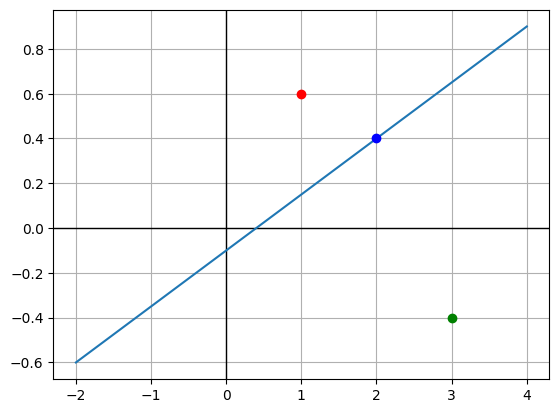

In [12]:
p1 = (2, 0.4)
p2 = (1, 0.6)
p3 = (3, -0.4)

plotline(a,b,c)
plt.plot(p1[0], p1[1], color='b', marker='o')
plt.plot(p2[0], p2[1], color='r', marker='o')
plt.plot(p3[0], p3[1], color='g', marker='o')

In [13]:
ret1 = a*p1[0] + b*p1[1] + c
print("%.2f" % ret1)

ret2 = a*p2[0] + b*p2[1] + c
print("%.2f" % ret2)

ret3 = a*p3[0] + b*p3[1] + c
print("%.2f" % ret3)


0.00
1.80
-4.20


Classificação Linear - SkLearn


0


0

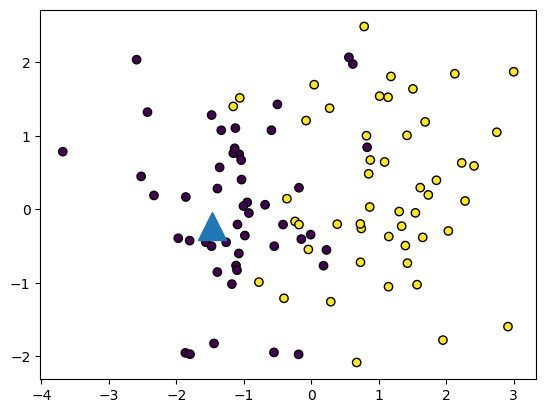

In [14]:
np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

p = X[10]
print(Y[10])
plt.plot(p[0], p[1], marker='^', markersize=20)

0



-4.4


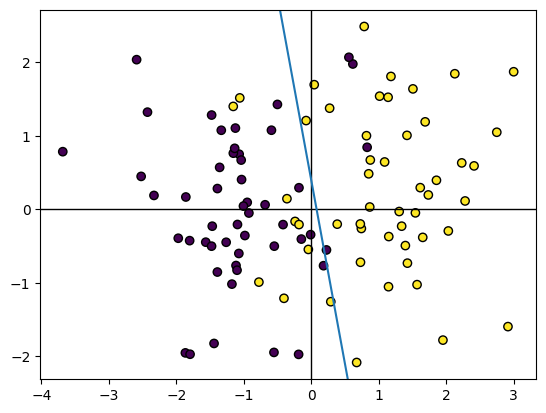

In [15]:
def plotmodel(w1, w2, b):

  plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
           edgecolor='k')

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x -b)/w2

  plt.axvline(0, -1, 1, color='k', linewidth=1)
  plt.axhline(0, -2, 4, color='k', linewidth=1)
  plt.plot(x, y, label='_nolegend_')

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = 5 #a
w2 = 1  #b
b  = -0.4  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)


1 yellow


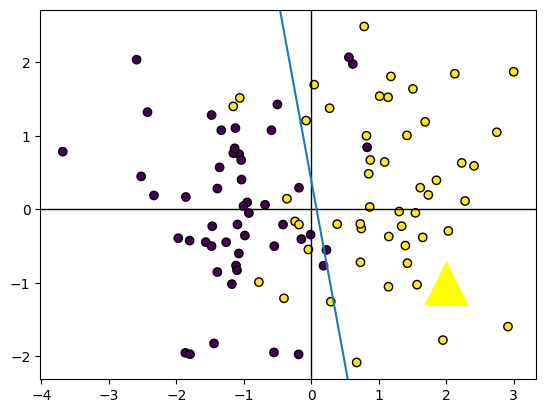

In [16]:
def classify(ponto, w1, w2, b):
  ret = w1 * ponto[0] + w2 * ponto[1] + b

  if ret >= 0:
    return 1, 'yellow'
  else:
    return 0, 'blue'

p = (2, -1)
classe, cor = classify(p, w1, w2, b)
print(classe, cor)

plotmodel(w1,w2, b)
plt.plot(p[0], p[1], marker='^', color=cor, markersize=30)

In [17]:
acertos = 0
for k in range(len(X)):
  categ, _ = classify(X[k], w1, w2, b)
  if categ == Y[k]:
    acertos += 1


print("Acurácia: {0}".format(100*acertos/len(X)))

Acurácia: 87.0


Camada Linear

In [18]:
torch.manual_seed(42)

perceptron = nn.Linear(3, 1)
print(perceptron)

for nome, tensor in perceptron.named_parameters():
  print(nome, '\t', tensor)

print('')
print(perceptron.weight.data)
print(perceptron.bias.data)


Linear(in_features=3, out_features=1, bias=True)
weight 	 Parameter containing:
tensor([[ 0.4414,  0.4792, -0.1353]], requires_grad=True)
bias 	 Parameter containing:
tensor([0.5304], requires_grad=True)

tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [19]:
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

In [20]:
def plot3d(perceptron):

  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()

  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3

  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(111, projection='3d')
  ax.view_init(azim=180)

  ax.plot_surface(X1, X2, X3, cmap='plasma')


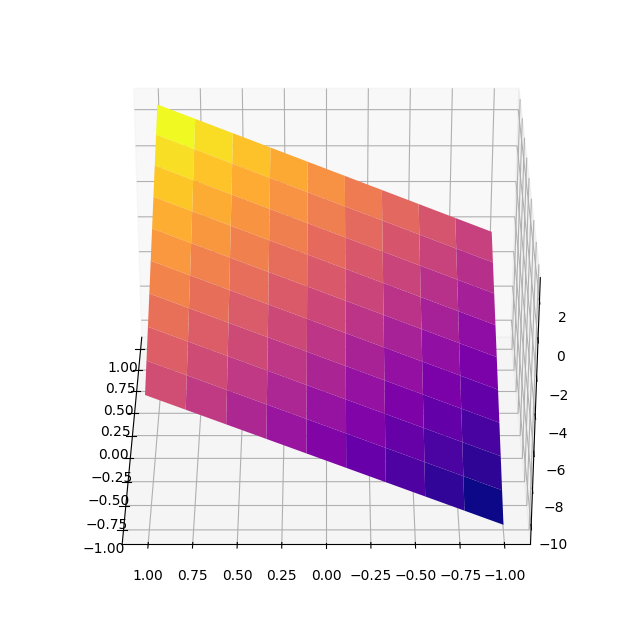

In [21]:
plot3d(perceptron)

tensor([0.7391], grad_fn=<ViewBackward0>)


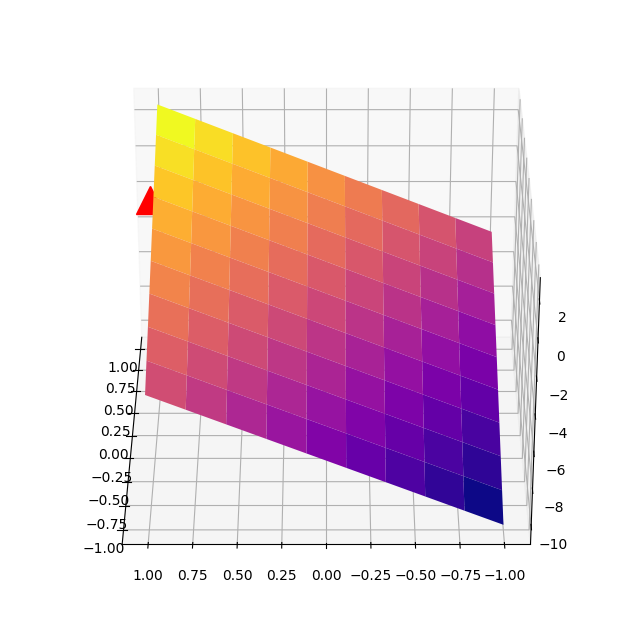

In [22]:
X = torch.Tensor([0, 1, 2])
y = perceptron(X)

print(y)

plot3d(perceptron)
plt.plot([X[0]], [X[1]], [X[2]], color='r', marker='^', markersize=20)

Funções de Ativação


-2.8


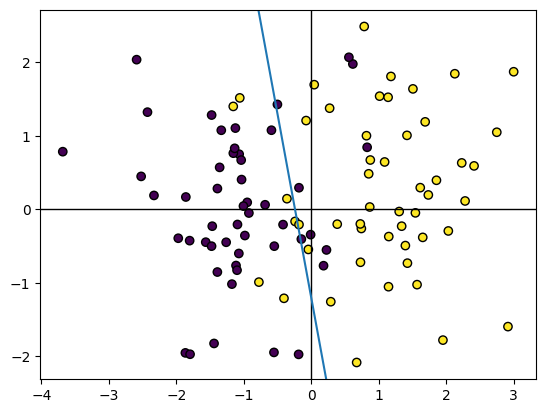

In [23]:
np.random.seed(46)

X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

w1 = 5 #a
w2 = 1  #b
b  = 1.2  #c
plotmodel(w1, w2, b)

p = (-1, 1)
print(w1 * p[0] + w2 * p[1] + b)


perceptron.weight = nn.Parameter(torch.Tensor([[w1, w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

In [24]:
perceptron = nn.Linear(2, 1)
sigmoide = nn.Sigmoid()

print(perceptron.weight.data)
print(perceptron.bias.data)

tensor([[-0.1549,  0.1427]])
tensor([-0.3443])


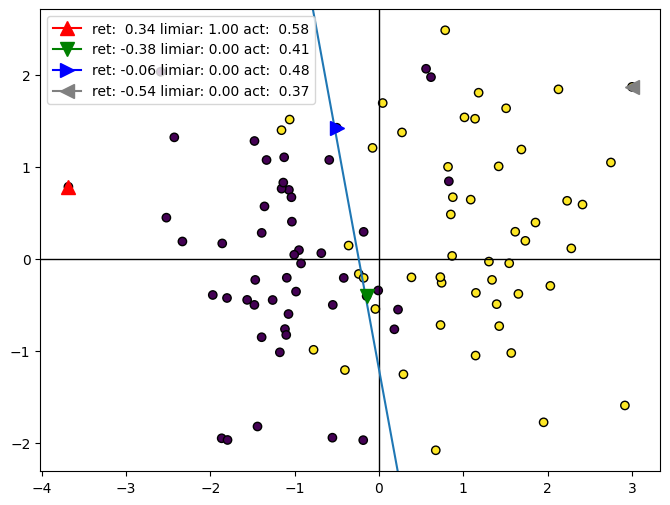

In [25]:
markers = ['^', 'v', '>', '<']
colors = ['r', 'g', 'b', 'gray']

plt.figure(figsize=(8, 6))
plotmodel(w1, w2, b)
for k, idx in enumerate([17, 21, 43, 66]):
  x = torch.Tensor(X[idx])

  ret = perceptron(x)
  act = sigmoide(ret)

  act_limiar = 0 if ret.data < 0 else 1

  label = 'ret: {:5.2f}'.format(ret.data.numpy()[0]) + ' limiar: {:4.2f}'.format(act_limiar) + ' act: {:5.2f}'.format(act.data.numpy()[0])
  plt.plot(x[0], x[1], marker=markers[k], color=colors[k], markersize=10, label=label)

plt.legend()
plt.show()

In [26]:
activation = nn.ReLU()
# activation = nn.Tanh()


Redes Neurais


Definindo uma arquitetura


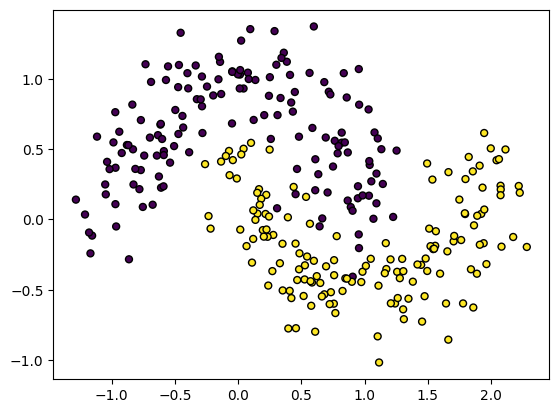

In [33]:
X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
 c=Y1, s=25, edgecolor='k')


nn.Sequential

In [34]:
input_size = 2
hidden_size = 8
output_size = 1


net = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size), # hidden (escondida)
                    nn.ReLU(),   # ativação não linear
                    nn.Linear(in_features=hidden_size, out_features=output_size)) # output (saída)
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [37]:
#summary(net, input_size=(1, input_size))

In [36]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


nn.Module


In [39]:
class MinhaRede(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(MinhaRede, self).__init__()

    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  def forward(self, X):

    # Gerar uma saída a partir do X
    hidden = self.relu(self.hidden(X))
    output = self.output(hidden)

    return output

Instanciando a Rede

In [40]:
net = MinhaRede(input_size, hidden_size, output_size)
print(net)


MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [41]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


In [43]:

if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [46]:
input_size = 2
hidden_size = 8
output_size = 1

net = MinhaRede(input_size,hidden_size, output_size)
net = net.to(device)
print(net)

MinhaRede(
  (hidden): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
)


In [47]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
tensor = tensor.to(device)
pred   = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])
